# Comparison of algorithms for Sentiment Analysis in IMDB movie review data

In [1135]:
import numpy as np
import re,os,string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd
# import os
# os.environ['PATH']

In [1161]:
rawfile = open(r'imdb_labelled.txt').readlines()

In [1191]:
reviews = pd.Series(rawfile)
reviews_df = reviews.str.extract(r'(.*)(\d)')
reviews_df.rename(columns={0 : 'Review',1 : 'Sentiment'},inplace=True)

## Pre-processing

In [1198]:
stop_words = set(stopwords.words('english'))    #Stop words removal
def join_l(l, sep):
    try:
        li = iter(l)
        string = str(next(li))
        for i in li:
            string += str(sep) + str(i)
        return string
    except Exception as e:
        print(e)
kl=0
for index,row in reviews_df.iterrows():
    a=''
    assign=' '   
    if np.any(np.equal(row['Review'],None)):
        print(index,"hs none")
        continue
#     print(index,"index")
#     print(len(row['Review']))
    a=a.join(row['Review'])
    #print(a.join(row['Review']),"is the pandas read")
    words = nltk.word_tokenize(a)           # Tokenization
    #print(words)
    words = [w.lower() for w in words]      # Change to lower case
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    words = [word for word in stripped if word.isalnum()]
#     words=[word.lower() for word in words if word.isalpha()]
#     print(words)#reviews_df.iloc(index,0)=
    words = [w for w in words if not w in stop_words]
#     print(words)
    reviews_df.iloc[kl,0]=join_l(words,' ')
    kl=kl+1
reviews_df.to_csv("results.csv")

## Train - Test Split

In [1200]:
from sklearn.model_selection import train_test_split
X = reviews_df['Review']
y = reviews_df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1201]:
a=[]
for index,row in reviews_df.iterrows():
    a.extend(row['Review'].split())

print(len(a))
print(len(set(a)))
    
reviews_df

7505
2978


,Review,Sentiment
0,ï slowmoving aimless movie distressed drifting...,0
1,sure lost flat characters audience nearly half...,0
2,attempting artiness black white clever camera ...,0
3,little music anything speak,0
4,best scene movie gerardo trying find song keep...,1
5,rest movie lacks art charm meaning emptiness w...,0
6,wasted two hours,0
7,saw movie today thought good effort good messa...,1
8,bit predictable,0
9,loved casting jimmy buffet science teacher,1


## Tf-idf Vectorization 

In [1202]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=len(set(a)))
# allDataVectorized = 
vectorizer.fit_transform(reviews_df['Review'])

<1000x2964 sparse matrix of type '<class 'numpy.float64'>'
	with 7315 stored elements in Compressed Sparse Row format>

In [1203]:
# Train_X, Test_X, Train_Y, Test_Y = train_test_split(reviews_df['Review'],reviews_df['Sentiment'],test_size=0.2)
trainX_vectors = vectorizer.transform(Train_X)
# trainy_vectors = vectorizer.transform(Train_Y)
testX_vectors = vectorizer.transform(Test_X) 
# testy_vectors = vectorizer.transform(Test_Y)

In [1142]:
# Train_Y

In [1204]:
Train_Y
train_y_int=[]
for i in Train_Y:
    train_y_int.append(i)
test_y_int=[]
for j in Test_Y:
    test_y_int.append(j)

In [ ]:
# reviews_df['Review'] = reviews_df['Review'].apply(lambda x: [item for item in x if item not in stop])

### SVM

In [1209]:
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
clf = SVC(kernel = 'linear', C = 1, gamma = 0.001)
# clf = SVC(C=1.0, kernel='linear', gamma='auto')
clf.fit(trainX_vectors,train_y_int) 
print(confusion_matrix(test_y_int,clf.predict(testX_vectors)))
print(classification_report(test_y_int,clf.predict(testX_vectors)))

[[84 15]
 [16 85]]
             precision    recall  f1-score   support

          0       0.84      0.85      0.84        99
          1       0.85      0.84      0.85       101

avg / total       0.85      0.84      0.85       200



## Grid Search for SVM tuning

In [1207]:
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [1208]:
svc_param_selection(testX_vectors,Test_Y,10)

{'C': 1, 'gamma': 0.001}

In [1211]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, precision_recall_curve,average_precision_score
from matplotlib import pyplot

# probs = Naive.predict_proba(testX_vectors)

# probs = probs[:, 1]
# # calculate AUC
# # auc = roc_auc_score(Test_Y, probs)
# # print('AUC: %.3f' % auc)
# # # calculate roc curve
# fpr, tpr, thresholds = roc_curve(Test_Y, probs)
# # # plot no skill
# # pyplot.plot([0, 1], [0, 1], linestyle='--')
# # # plot the roc curve for the model
# pyplot.plot(fpr, tpr, marker='.')
# # show the plot
# pyplot.show()

## RandomForest Classifier

In [1213]:
# from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
# modelSGD = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
# modelSGD.fit(trainX_vectors,Train_Y)
# print(classification_report(Test_Y,modelSGD.predict(testX_vectors)))
randomforest = RandomForestClassifier(n_estimators=200)
randomforest.fit(trainX_vectors,Train_Y)
print(confusion_matrix(Test_Y,randomforest.predict(testX_vectors)))
print(classification_report(Test_Y,randomforest.predict(testX_vectors)))

[[84 15]
 [28 73]]
             precision    recall  f1-score   support

          0       0.75      0.85      0.80        99
          1       0.83      0.72      0.77       101

avg / total       0.79      0.79      0.78       200



## Naive Bayes

In [1215]:
from sklearn import naive_bayes
Naive = naive_bayes.MultinomialNB()
Naive.fit(trainX_vectors,train_y_int) 
# print(clf.predict([[-0.8, -1]]))
print(confusion_matrix(test_y_int,Naive.predict(testX_vectors)))
print(classification_report(test_y_int,Naive.predict(testX_vectors),digits=3))

[[82 17]
 [15 86]]
             precision    recall  f1-score   support

          0      0.845     0.828     0.837        99
          1      0.835     0.851     0.843       101

avg / total      0.840     0.840     0.840       200



## CNN

In [1245]:
import numpy
import torch

# X = numpy.random.uniform(0,1,800*3059).reshape(800,3059,-1)
# torch.tensor()
# print(X.shape)
# Y = np.random.randint(0, 9, 10).reshape(1, 1, -1)

class Simple1DCNN(torch.nn.Module):
    def __init__(self,t):
        super(Simple1DCNN, self).__init__()
#         self.dense = torch.nn.Linear(5,3059)
        
        self.embed = torch.nn.Linear(2964,50,1)
        self.layer1 = torch.nn.Conv1d(in_channels=50, out_channels=20, kernel_size=1, stride=2)
        self.act1 = torch.nn.ReLU()
        self.layer1b = torch.nn.Conv1d(in_channels=20, out_channels=10, kernel_size=1, stride=2)
        self.act1b = torch.nn.ReLU()
#         self.layer2 = torch.nn.Conv1d(in_channels=10, out_channels=2, kernel_size=1)
        self.dense = torch.nn.Linear(10,2)
        self.sigmoid = torch.nn.Sigmoid()
        self.t=t
    def forward(self, x):
#         x = self.dense(x)
        x = x.view(self.t,2964)
        x = self.embed(x).unsqueeze(-1)
        x = self.layer1(x)
        x = self.act1(x)
        x = self.layer1b(x)
        x = self.act1b(x)
#         x = self.layer2(x)
        x= x.view(self.t,-1)
        x = self.dense(x)

        log_probs = self.sigmoid(x)

        return log_probs

model = Simple1DCNN(800).double()
# print(model(torch.tensor(X).shape))


In [1246]:
torch_trainX_tensor.shape

torch.Size([800, 2964])

In [1247]:
torch_trainX_tensor = torch.tensor(trainX_vectors.todense())
torch_testX_tensor = torch.tensor(testX_vectors.todense())

In [1248]:
torch_trainX_tensor.shape

torch.Size([800, 2964])

In [1249]:
from sklearn.preprocessing import OneHotEncoder
# lc = LabelBinarizer(neg_label=0, pos_label=1,sparse_output=False).fit(np.array([['1'],['0']]))
# print(lc.classes_)
# trans=lc.transform(Train_Y)
# print(trans.shape)
# print(lc.transform()
# oh=OneHotEncoder(n_values=2)
# print(oh.fit_transform(np.expand_dims(Train_Y.values,-1)))
# oh = OneHotEncoder()
# oh.fit(np.array([['0'],['1']]))
# print(oh.transform(np.expand_dims(Train_Y.values,-1)))
y=[]
for x in Train_Y.values:
    y.append([0,1] if x=='1' else [1,0])
    

torch_trainY = torch.tensor(np.array(y,dtype="uint8"),dtype=torch.double)
torch_trainY.shape

torch.Size([800, 2])

In [1250]:
y1 = []
for x in Test_Y.values:
    y1.append([0,1] if x =='1' else [1,0])

torch_testY = torch.tensor(np.array(y1,dtype="uint8"),dtype=torch.double)
torch_testY.shape

torch.Size([200, 2])

In [1251]:
torch.set_default_tensor_type('torch.DoubleTensor')

In [1252]:
net.eval

<bound method Module.eval of Simple1DCNN(
  (embed): Linear(in_features=3059, out_features=50, bias=True)
  (layer1): Conv1d(50, 20, kernel_size=(1,), stride=(2,))
  (act1): ReLU()
  (layer1b): Conv1d(20, 10, kernel_size=(1,), stride=(2,))
  (act1b): ReLU()
  (dense): Linear(in_features=10, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)>

In [1263]:
net = Simple1DCNN(800)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

for i in range(1,20):
    
    optimizer.zero_grad() # zero the gradient buffer
    outputs = net(torch_trainX_tensor.unsqueeze(-1))
    
    loss = criterion(outputs.squeeze(-1), torch_trainY)
    print("EPOCH =="+str(i), end = "\r")
    print(loss)
    loss.backward()
    optimizer.step()

tensor(0.6940, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6925, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6901, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6862, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6809, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6743, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6653, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6526, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6355, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6132, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5847, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5479, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5032, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4523, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3964, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3371, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2772, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2198, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1675, grad_fn=<BinaryCrossEntropyBack

In [1264]:
#save the model
torch.save(net.state_dict(), 'model.pth')

In [1265]:
x = torch.load('model.pth')

In [1266]:
model_test=Simple1DCNN(200)
model_test.load_state_dict(torch.load('model.pth'))
model_test.eval()

Simple1DCNN(
  (embed): Linear(in_features=2964, out_features=50, bias=True)
  (layer1): Conv1d(50, 20, kernel_size=(1,), stride=(2,))
  (act1): ReLU()
  (layer1b): Conv1d(20, 10, kernel_size=(1,), stride=(2,))
  (act1b): ReLU()
  (dense): Linear(in_features=10, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)

In [1042]:
# fpr1, tpr1, threshold = metrics.roc_curve(inf_results,test_y_int)
# pyplot.plot(fpr1, tpr1, marker='.')
# pyplot.show()

In [1267]:
inf_results=model_test(torch_testX_tensor)
resultsnp =inf_results.detach().numpy()
resultsnp = np.argmax(resultsnp,axis = 1)

In [1268]:
new_y  = np.array(Test_Y,dtype='uint8')

In [1269]:
print(confusion_matrix(new_y,resultsnp))
print(classification_report(new_y,resultsnp))

[[87 12]
 [20 81]]
             precision    recall  f1-score   support

          0       0.81      0.88      0.84        99
          1       0.87      0.80      0.84       101

avg / total       0.84      0.84      0.84       200



In [1270]:
criterion(inf_results, torch_testY)

tensor(0.4363, grad_fn=<BinaryCrossEntropyBackward>)

In [1271]:
inf_results

tensor([[0.1001, 0.7666],
        [0.2092, 0.6800],
        [0.2273, 0.6676],
        [0.9233, 0.0223],
        [0.2740, 0.6407],
        [0.3198, 0.6015],
        [0.3144, 0.5790],
        [0.3371, 0.5700],
        [0.1044, 0.7626],
        [0.9341, 0.0173],
        [0.1954, 0.6888],
        [0.8739, 0.0509],
        [0.9824, 0.0021],
        [0.8425, 0.0686],
        [0.5019, 0.3329],
        [0.8122, 0.0991],
        [0.5167, 0.3489],
        [0.9330, 0.0178],
        [0.1834, 0.6983],
        [0.1190, 0.7496],
        [0.7689, 0.1117],
        [0.8436, 0.0727],
        [0.7597, 0.1397],
        [0.2648, 0.6448],
        [0.8565, 0.0632],
        [0.8106, 0.0800],
        [0.1274, 0.7422],
        [0.1930, 0.6917],
        [0.3059, 0.6219],
        [0.3547, 0.5544],
        [0.7773, 0.1251],
        [0.2718, 0.6412],
        [0.1029, 0.7651],
        [0.9084, 0.0298],
        [0.1033, 0.7628],
        [0.5707, 0.3387],
        [0.6355, 0.2250],
        [0.9301, 0.0191],
        [0.8

In [1272]:
print(net(torch_trainX_tensor.unsqueeze(-1)))
# print(net(torch_testX_tensor.unsqueeze(-1)))

tensor([[0.9523, 0.0103],
        [0.0624, 0.8104],
        [0.9468, 0.0123],
        ...,
        [0.0411, 0.8428],
        [0.1195, 0.7476],
        [0.9708, 0.0047]], grad_fn=<SigmoidBackward>)


In [837]:
import matplotlib.pyplot as plt

In [1273]:
inf_results.shape

torch.Size([200, 2])

In [1274]:
DLpred = []
np_dl_pred = np.zeros([len(resultsnp),2])
for i in range(len(resultsnp)):
    if int(resultsnp[i])==1:
        DLpred.append(1)
    else:
        DLpred.append(0)

In [1139]:
# DLpred

In [1133]:
# fpr, tpr, threshold = metrics.roc_curve(grd,DLpred)
# pyplot.plot(fpr, tpr, label= 'DL', marker='.')
# # pyplot.show()
# dl_roc_auc = metrics.auc(fpr, tpr)
# dl_roc_auc

## ROC curve

In [1275]:
#NB
naive_pred=Naive.predict(testX_vectors)
# print(Naive_pred)
NVpred=[]
np_nb_pred=np.zeros([len(naive_pred),2])
for i in range(len(naive_pred)):
    if int(naive_pred[i]) ==1:
        NVpred.append(1)
    else:
        NVpred.append(0)
        
#SVM        
svm_predictions=clf.predict(testX_vectors)
# print(svm_predictions)
pred=[]
np_svm_pred=np.zeros([len(svm_predictions),2])
for i in range(len(svm_predictions)):
    if int(svm_predictions[i]) ==1:
        pred.append(1)
    else:
        pred.append(0)
 
#RF
rf_pred = randomforest.predict(testX_vectors)
random_pred = []
np_rf_pred=np.zeros([len(rf_pred),2])
for i in range(len(rf_pred)):
    if int(rf_pred[i]) ==1:
        random_pred.append(1)
    else:
        random_pred.append(0)

#DL
DLpred = []
np_dl_pred = np.zeros([len(resultsnp),2])
for i in range(len(resultsnp)):
    if int(resultsnp[i])==1:
        DLpred.append(1)
    else:
        DLpred.append(0)

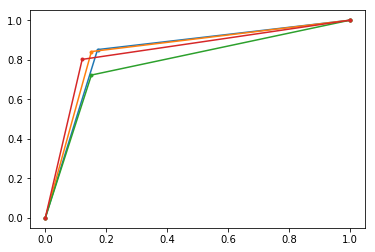

ROC_AUC score of SVM 0.845034503450345
ROC_AUC score of Naive Bayes 0.8398839883988398
ROC_AUC score of Random Forest 0.7856285628562857
ROC_AUC score of CNN 0.8403840384038405


In [1276]:
ground_truth_test=np.array(test_y_int)
# print(ground_truth_test)
grd=[]
for i in ground_truth_test:
    if i == '1':
        grd.append(1)
    else:
        grd.append(0)
        
# for NV Bayes        
fpr, tpr, threshold = metrics.roc_curve(grd,NVpred)
pyplot.plot(fpr, tpr, marker='.')
# pyplot.show()
nb_roc_auc = metrics.auc(fpr, tpr)

# for SVM
fpr, tpr, threshold = metrics.roc_curve(grd,pred)
pyplot.plot(fpr, tpr, marker='.')
# pyplot.show()
svm_roc_auc = metrics.auc(fpr, tpr)

# for RF CLassifier
fpr, tpr, threshold = metrics.roc_curve(grd,random_pred)
pyplot.plot(fpr, tpr, marker='.')
# pyplot.show()
rf_roc_auc = metrics.auc(fpr, tpr)

#forDL
fpr, tpr, threshold = metrics.roc_curve(grd,DLpred)
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
dl_roc_auc = metrics.auc(fpr, tpr)


print('ROC_AUC score of SVM {}'.format(svm_roc_auc))
print('ROC_AUC score of Naive Bayes {}'.format(nb_roc_auc))
print('ROC_AUC score of Random Forest {}'.format(rf_roc_auc))
print('ROC_AUC score of CNN {}'.format(dl_roc_auc))